# Laptop Price Predictor

Bu projede amaç; Üretici şirketlerin marka değerlerini hariç tutarak bir laptopun fiyatının ne olacağını hesaplayan bir algoritma tasarlamaktır.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("laptop_data.csv", index_col=0)
data.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


Tarih => 3 şubat 2023/// Güncel Kur=> 1 Rupi = 0.23 TL

Tarih => 3 şubat 2023/// Güncel Kur=> 1 TL = 18.82 USD

Fiyatlar buna göre yeniden düzenlenmiştir

In [3]:
data["Price"] = data["Price"]*0.23
data.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,16417.097136
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,11015.970336
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,7046.280000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,31094.927280
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,22102.035840


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   object 
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   object 
 10  Price             1303 non-null   float64
dtypes: float64(2), object(9)
memory usage: 122.2+ KB


In [5]:
data["Ram"] = data["Ram"].str.replace("GB", "")
data["Ram"] = data["Ram"].astype("int32")

data["Weight"] = data["Weight"].str.replace("kg", "")
data["Weight"] = data["Weight"].astype("float64")

In [6]:
data.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,16417.097136
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,11015.970336
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,7046.280000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,31094.927280
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,22102.035840


## Veriye Genel Bakış

In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Inches,1303.0,15.017191,1.426304,10.1000,14.0000,15.6000,15.600000,18.4000
Ram,1303.0,8.382195,5.084665,2.0000,4.0000,8.0000,8.000000,64.0000
Weight,1303.0,2.038734,0.665475,0.6900,1.5000,2.0400,2.300000,4.7000
Price,1303.0,13770.109869,8565.936411,2132.2656,7340.3856,11972.5488,18233.076672,74739.5856


-Ram için %75 değeri => min değere, max değere olduğundan daha yakın

-Price için %75 değeri  => min değere, max değere olduğundan daha yakın

<AxesSubplot:xlabel='Price', ylabel='Count'>

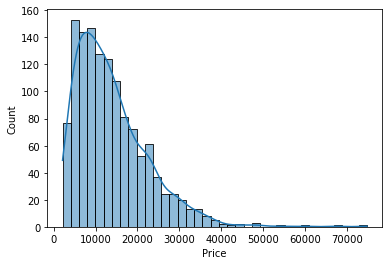

In [8]:
sns.histplot(data["Price"], kde = True)

Fiyat değişkeninde aykırı gözlemleri atıyorum

In [9]:
Q1 = data["Price"].quantile(0.25)
Q3 = data["Price"].quantile(0.75)
IQR = Q3-Q1
tavan_fiyat = Q3+1.5*IQR

In [10]:
data = data[data["Price"] <= tavan_fiyat]
data = data.reset_index(drop=True)
data.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,16417.097136
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,11015.970336
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,7046.280000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,31094.927280
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,22102.035840


In [11]:
data.tail()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
1269,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4,128GB SSD,Intel HD Graphics 520,Windows 10,1.80,7818.3072
1270,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16,512GB SSD,Intel HD Graphics 520,Windows 10,1.30,18369.3456
1271,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2,64GB Flash Storage,Intel HD Graphics,Windows 10,1.50,2806.2576
1272,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19,9362.3616
1273,Asus,Notebook,15.6,1366x768,Intel Celeron Dual Core N3050 1.6GHz,4,500GB HDD,Intel HD Graphics,Windows 10,2.20,4521.8736


In [12]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Inches,1274.0,14.984929,1.411737,10.1000,14.000000,15.6000,15.600000,18.400
Ram,1274.0,8.064364,4.329580,2.0000,4.000000,8.0000,8.000000,32.000
Weight,1274.0,2.010416,0.626126,0.6900,1.500000,2.0400,2.300000,4.600
Price,1274.0,13113.541844,7310.716800,2132.2656,7317.623052,11678.4432,17485.987176,34480.818


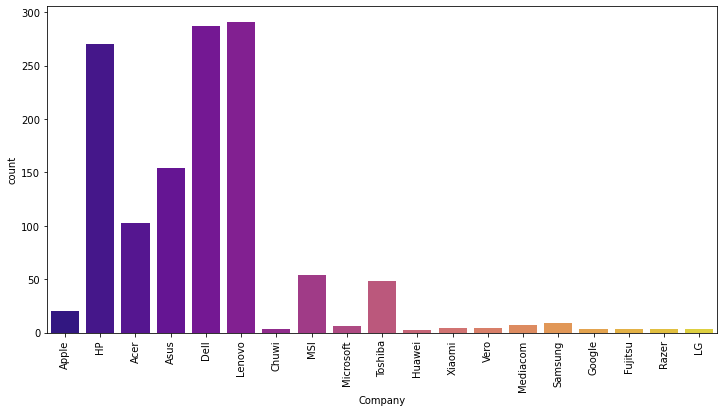

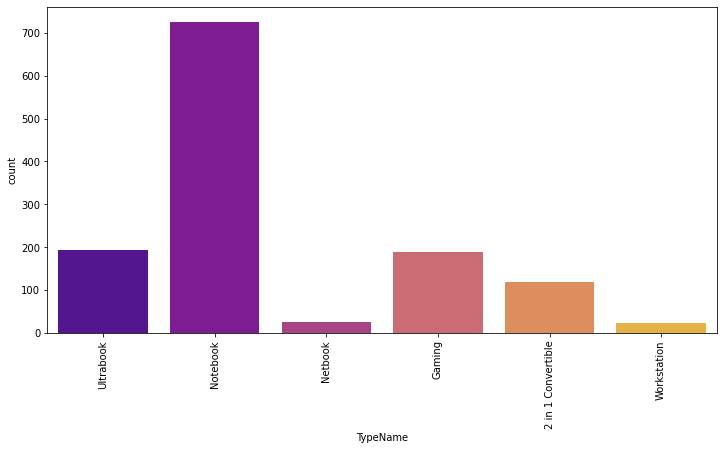

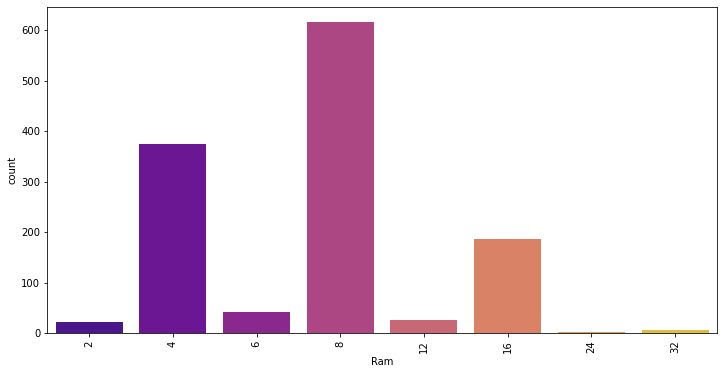

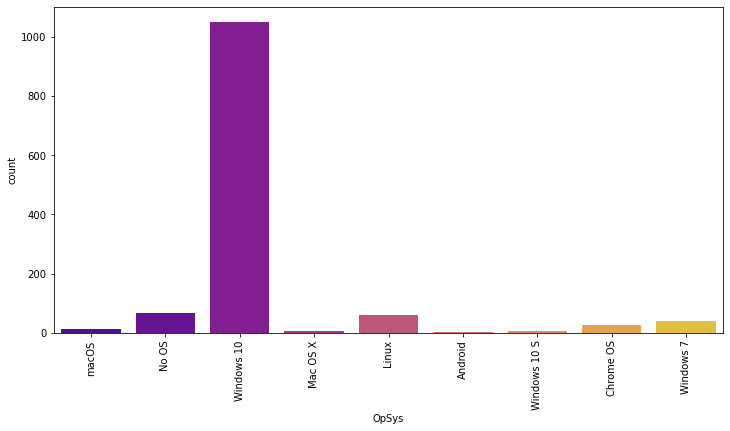

In [13]:
grafikler = ["Company", "TypeName", "Ram", "OpSys"]

for col in grafikler:
    plt.figure(figsize = (12,6))
    sns.countplot(x = data[col], palette = "plasma")
    plt.xticks(rotation = "vertical")

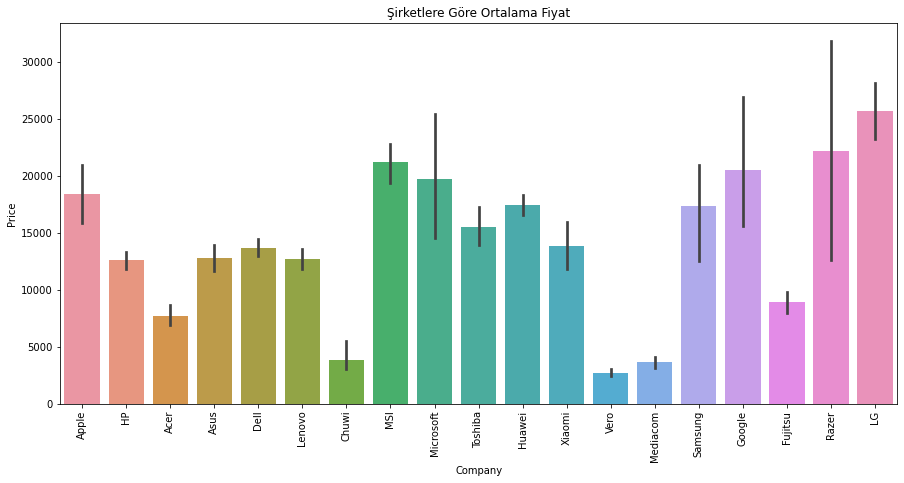

In [14]:
plt.figure(figsize=(15,7))
sns.barplot(x = data["Company"], y = data["Price"])
plt.title("Şirketlere Göre Ortalama Fiyat")
plt.xticks(rotation="vertical")
plt.show()

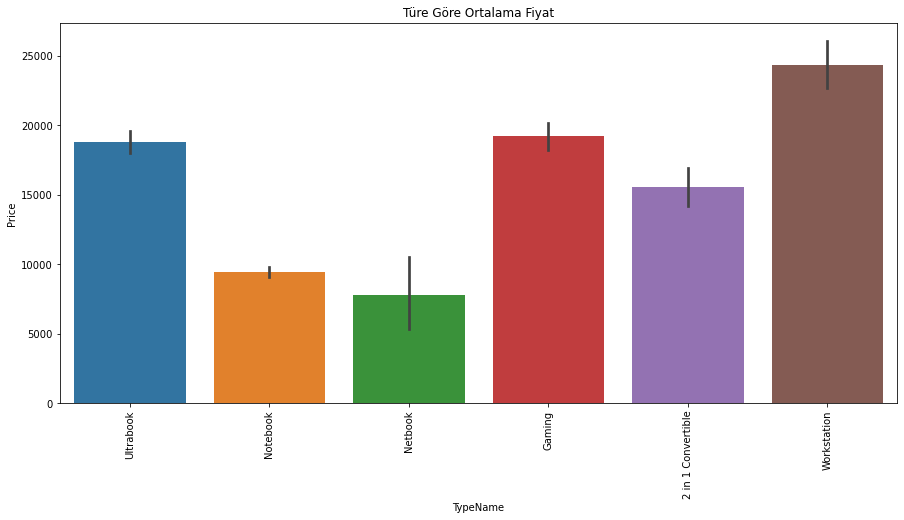

In [15]:
plt.figure(figsize=(15,7))
sns.barplot(x = data["TypeName"], y = data["Price"])
plt.title("Türe Göre Ortalama Fiyat")
plt.xticks(rotation="vertical")
plt.show()

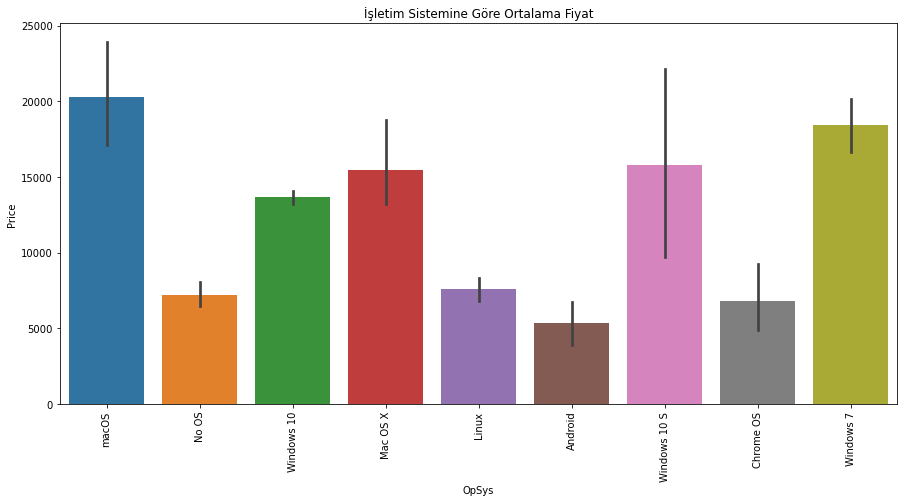

In [16]:
plt.figure(figsize=(15,7))
sns.barplot(x = data["OpSys"], y = data["Price"])
plt.title("İşletim Sistemine Göre Ortalama Fiyat")
plt.xticks(rotation="vertical")
plt.show()

## Veri Ön İşleme

### Ekranlar

Touchscreen, IPS Panel ve çözünürlük değerlerini önemsiyorum

In [17]:
ekranlar = list(data["ScreenResolution"])
touchscreen = []

for i in ekranlar:
    if "Touchscreen" in i:
        touchscreen.append(1)
    else:
        touchscreen.append(0)
data["Touchscreen"] = touchscreen
data.head(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,16417.097136,0
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,11015.970336,0
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,7046.280000,0
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,31094.927280,0
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,22102.035840,0


In [18]:
IPS = []
for i in ekranlar:
    if "IPS Panel" in i:
        IPS.append(1)
    else:
        IPS.append(0)
data["IPS Panel"] = IPS
data.head(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS Panel
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,16417.097136,0,1
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,11015.970336,0,0
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,7046.280000,0,0
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,31094.927280,0,1
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,22102.035840,0,1


In [19]:
cozunurluk = []
for i in data["ScreenResolution"]:
    width, height = i.split(" ")[-1].split("x")
    result = int(width) * int(height)
    cozunurluk.append(result)
data["ScreenResolution"] = cozunurluk
data.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS Panel
0,Apple,Ultrabook,13.3,4096000,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,16417.097136,0,1
1,Apple,Ultrabook,13.3,1296000,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,11015.970336,0,0
2,HP,Notebook,15.6,2073600,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,7046.280000,0,0
3,Apple,Ultrabook,15.4,5184000,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,31094.927280,0,1
4,Apple,Ultrabook,13.3,4096000,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,22102.035840,0,1


<AxesSubplot:>

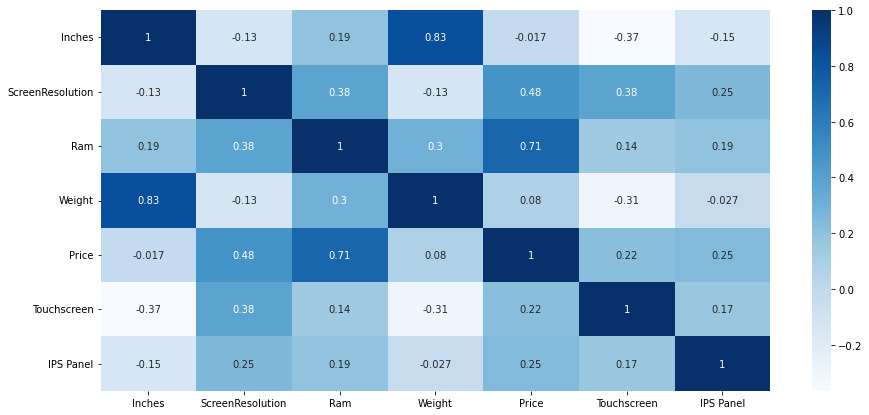

In [20]:
plt.figure(figsize=(15,7))
sns.heatmap(data.corr(), annot=True, cmap="Blues")

### İşlemciler

5 ana sınıfa inceleyeceğim

In [21]:
data["Cpu"] = data["Cpu"].apply(lambda text: " ".join(text.split()[:3]))
data.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS Panel
0,Apple,Ultrabook,13.3,4096000,Intel Core i5,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,16417.097136,0,1
1,Apple,Ultrabook,13.3,1296000,Intel Core i5,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,11015.970336,0,0
2,HP,Notebook,15.6,2073600,Intel Core i5,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,7046.280000,0,0
3,Apple,Ultrabook,15.4,5184000,Intel Core i7,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,31094.927280,0,1
4,Apple,Ultrabook,13.3,4096000,Intel Core i5,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,22102.035840,0,1


In [22]:
data["CPU_name"] = data["Cpu"].apply(lambda x: x if x == "Intel Core i7" or x == "Intel Core i5" or x == "Intel Core i3" else "Other Intel Processor" if x.split()[0] == "Intel" else "AMD Processor")
data.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS Panel,CPU_name
0,Apple,Ultrabook,13.3,4096000,Intel Core i5,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,16417.097136,0,1,Intel Core i5
1,Apple,Ultrabook,13.3,1296000,Intel Core i5,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,11015.970336,0,0,Intel Core i5
2,HP,Notebook,15.6,2073600,Intel Core i5,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,7046.280000,0,0,Intel Core i5
3,Apple,Ultrabook,15.4,5184000,Intel Core i7,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,31094.927280,0,1,Intel Core i7
4,Apple,Ultrabook,13.3,4096000,Intel Core i5,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,22102.035840,0,1,Intel Core i5


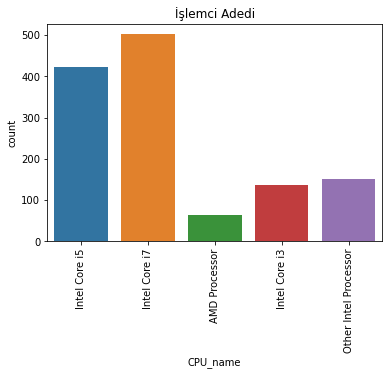

In [23]:
sns.countplot(x = data["CPU_name"])
plt.title("İşlemci Adedi")
plt.xticks(rotation = "vertical");

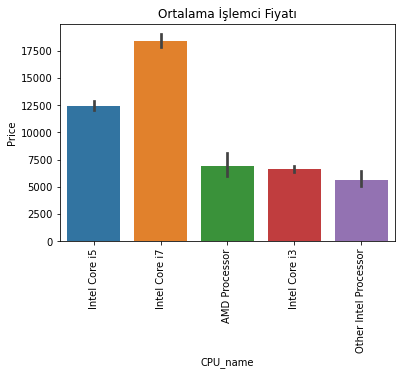

In [24]:
sns.barplot(x = data["CPU_name"], y = data["Price"])
plt.title("Ortalama İşlemci Fiyatı")
plt.xticks(rotation = "vertical");

In [25]:
cpu = []

for i in data["CPU_name"]:
    if i == "Other Intel Processor":
        cpu.append(0)
    elif i == "Intel Core i3":
        cpu.append(1)
    elif i == "AMD Processor":
        cpu.append(2)
    elif i == "Intel Core i5":
        cpu.append(3)
    else:
        cpu.append(4)
data["Cpu"] = cpu
data.drop(columns=["CPU_name"], inplace=True)
data.head(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS Panel
0,Apple,Ultrabook,13.3,4096000,3,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,16417.097136,0,1
1,Apple,Ultrabook,13.3,1296000,3,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,11015.970336,0,0
2,HP,Notebook,15.6,2073600,3,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,7046.280000,0,0
3,Apple,Ultrabook,15.4,5184000,4,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,31094.927280,0,1
4,Apple,Ultrabook,13.3,4096000,3,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,22102.035840,0,1


In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1274 entries, 0 to 1273
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1274 non-null   object 
 1   TypeName          1274 non-null   object 
 2   Inches            1274 non-null   float64
 3   ScreenResolution  1274 non-null   int64  
 4   Cpu               1274 non-null   int64  
 5   Ram               1274 non-null   int32  
 6   Memory            1274 non-null   object 
 7   Gpu               1274 non-null   object 
 8   OpSys             1274 non-null   object 
 9   Weight            1274 non-null   float64
 10  Price             1274 non-null   float64
 11  Touchscreen       1274 non-null   int64  
 12  IPS Panel         1274 non-null   int64  
dtypes: float64(3), int32(1), int64(4), object(5)
memory usage: 124.5+ KB


### Bellekler

HDD, SDD, Flash Storage ve Hybrid olarak 4 tipte bellekleri ayıracağım. Birden fazla belleği olan laptopların durumu dikkate alınmıştır

In [27]:
data.groupby("Memory").count()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Gpu,OpSys,Weight,Price,Touchscreen,IPS Panel
Memory,,,,,,,,,,,,
1.0TB HDD,1,1,1,1,1,1,1,1,1,1,1,1
1.0TB Hybrid,9,9,9,9,9,9,9,9,9,9,9,9
128GB Flash Storage,4,4,4,4,4,4,4,4,4,4,4,4
128GB HDD,1,1,1,1,1,1,1,1,1,1,1,1
128GB SSD,76,76,76,76,76,76,76,76,76,76,76,76
128GB SSD + 1TB HDD,93,93,93,93,93,93,93,93,93,93,93,93
128GB SSD + 2TB HDD,2,2,2,2,2,2,2,2,2,2,2,2
16GB Flash Storage,7,7,7,7,7,7,7,7,7,7,7,7
16GB SSD,3,3,3,3,3,3,3,3,3,3,3,3


In [28]:
data["Memory"] = data["Memory"].astype(str).replace("\0","",regex=True)
data["Memory"] = data["Memory"].str.replace("GB", "")
data["Memory"] = data["Memory"].str.replace("TB", "000")

new_mem = data["Memory"].str.split("+", n=1, expand=True)
new_mem.columns = ["P1", "P2"]
new_mem

,P1,P2
0,128 SSD,None
1,128 Flash Storage,None
2,256 SSD,None
3,512 SSD,None
4,256 SSD,None
...,...,...
1269,128 SSD,None
1270,512 SSD,None
1271,64 Flash Storage,None
1272,1000 HDD,None


In [29]:
new_mem["P2"].fillna(0, inplace=True)
new_mem

,P1,P2
0,128 SSD,0
1,128 Flash Storage,0
2,256 SSD,0
3,512 SSD,0
4,256 SSD,0
...,...,...
1269,128 SSD,0
1270,512 SSD,0
1271,64 Flash Storage,0
1272,1000 HDD,0


In [30]:
new_mem[new_mem["P2"] != 0]

,P1,P2
20,128 SSD,1000 HDD
27,256 SSD,256 SSD
36,128 SSD,1000 HDD
40,256 SSD,1000 HDD
46,256 SSD,1000 HDD
...,...,...
1209,128 SSD,1000 HDD
1216,256 SSD,1000 HDD
1218,256 SSD,1000 HDD
1227,128 SSD,1000 HDD


In [31]:
data["HDD"] = 0
data["SSD"] = 0
data["Flash Storage"] = 0
data["Hybrid"] = 0
data.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS Panel,HDD,SSD,Flash Storage,Hybrid
0,Apple,Ultrabook,13.3,4096000,3,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,16417.097136,0,1,0,0,0,0
1,Apple,Ultrabook,13.3,1296000,3,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,11015.970336,0,0,0,0,0,0
2,HP,Notebook,15.6,2073600,3,8,256 SSD,Intel HD Graphics 620,No OS,1.86,7046.280000,0,0,0,0,0,0
3,Apple,Ultrabook,15.4,5184000,4,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,31094.927280,0,1,0,0,0,0
4,Apple,Ultrabook,13.3,4096000,3,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,22102.035840,0,1,0,0,0,0


In [32]:
for i in new_mem.index:
    
    x, y = new_mem.loc[i][0].split()[0], new_mem.loc[i][0].split()[1]
    
    if y == 'HDD':
        data["HDD"][i] = x
    elif y == "SSD":
        data["SSD"][i] = x
    elif y == "Flash":
        data["Flash Storage"][i] = x
    elif y == "Hybrid":
        data["Hybrid"][i] = x

for i in new_mem.index:
    
    if new_mem.loc[i][1] != 0:
        
        x,y = new_mem.loc[i][1].split()[0], new_mem.loc[i][1].split()[1]
        a,b = new_mem.loc[i][0].split()[0], new_mem.loc[i][0].split()[1]
    
        if y != b:
            if y == 'HDD':
                data["HDD"][i] = x
            elif y == "SSD":
                data["SSD"][i] = x
            elif y == "Flash":
                data["Flash Storage"][i] = x
            elif y == "Hybrid":
                data["Hybrid"][i] = x
                
        else:
            if y == 'HDD':
                data["HDD"][i] = int(x)+int(a)
            elif y == "SSD":
                data["SSD"][i] = int(x)+int(a)
            elif y == "Flash":
                data["Flash Storage"][i] = int(x)+int(a)
            elif y == "Hybrid":
                data["Hybrid"][i] = int(x)+int(a)

C:\Users\ogn_1\AppData\Local\Temp\ipykernel_13028\2479708570.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["SSD"][i] = x
C:\Users\ogn_1\AppData\Local\Temp\ipykernel_13028\2479708570.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Flash Storage"][i] = x
C:\Users\ogn_1\AppData\Local\Temp\ipykernel_13028\2479708570.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["HDD"][i] = x
C:\Users\ogn_1\AppData\Local\Tem

In [33]:
data.head(30)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS Panel,HDD,SSD,Flash Storage,Hybrid
0,Apple,Ultrabook,13.3,4096000,3,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,16417.097136,0,1,0,128,0,0
1,Apple,Ultrabook,13.3,1296000,3,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,11015.970336,0,0,0,0,128,0
2,HP,Notebook,15.6,2073600,3,8,256 SSD,Intel HD Graphics 620,No OS,1.86,7046.280000,0,0,0,256,0,0
3,Apple,Ultrabook,15.4,5184000,4,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,31094.927280,0,1,0,512,0,0
4,Apple,Ultrabook,13.3,4096000,3,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,22102.035840,0,1,0,256,0,0
5,Acer,Notebook,15.6,1049088,2,4,500 HDD,AMD Radeon R5,Windows 10,2.10,4901.760000,0,0,500,0,0,0
6,Apple,Ultrabook,15.4,5184000,4,16,256 Flash Storage,Intel Iris Pro Graphics,Mac OS X,2.04,26224.048368,0,1,0,0,256,0
7,Apple,Ultrabook,13.3,1296000,3,8,256 Flash Storage,Intel HD Graphics 6000,macOS,1.34,14199.173280,0,0,0,0,256,0
8,Asus,Ultrabook,14.0,2073600,4,16,512 SSD,Nvidia GeForce MX150,Windows 10,1.30,18320.328000,0,0,0,512,0,0
9,Acer,Ultrabook,14.0,2073600,3,8,256 SSD,Intel UHD Graphics 620,Windows 10,1.60,9435.888000,0,1,0,256,0,0


In [34]:
data["HDD"] = data["HDD"].astype(float)
data["SSD"] = data["SSD"].astype(int)
data["Flash Storage"] = data["Flash Storage"].astype(int)
data["Hybrid"] = data["Hybrid"].astype(float)
data.drop("Memory", axis = 1,inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1274 entries, 0 to 1273
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1274 non-null   object 
 1   TypeName          1274 non-null   object 
 2   Inches            1274 non-null   float64
 3   ScreenResolution  1274 non-null   int64  
 4   Cpu               1274 non-null   int64  
 5   Ram               1274 non-null   int32  
 6   Gpu               1274 non-null   object 
 7   OpSys             1274 non-null   object 
 8   Weight            1274 non-null   float64
 9   Price             1274 non-null   float64
 10  Touchscreen       1274 non-null   int64  
 11  IPS Panel         1274 non-null   int64  
 12  HDD               1274 non-null   float64
 13  SSD               1274 non-null   int32  
 14  Flash Storage     1274 non-null   int32  
 15  Hybrid            1274 non-null   float64
dtypes: float64(5), int32(3), int64(4), object(

### Grafik Kartları

Sadece markalara göre bir ayrım yaptım. Bu kısım daha ayrıntılı incelenmeli

In [35]:
data["Gpu"].value_counts()[0:20]

Intel HD Graphics 620         280
Intel HD Graphics 520         185
Intel UHD Graphics 620         68
Nvidia GeForce GTX 1050        66
Nvidia GeForce GTX 1060        46
Nvidia GeForce 940MX           43
AMD Radeon 530                 41
Intel HD Graphics 500          39
Intel HD Graphics 400          37
Intel HD Graphics              29
Nvidia GeForce GTX 1050 Ti     28
Nvidia GeForce GTX 1070        23
AMD Radeon R5 M430             22
Nvidia GeForce 930MX           20
AMD Radeon 520                 17
Nvidia GeForce MX150           15
Intel HD Graphics 515          14
Intel HD Graphics 615          14
AMD Radeon R7 M445             14
Nvidia GeForce GTX 960M        14
Name: Gpu, dtype: int64

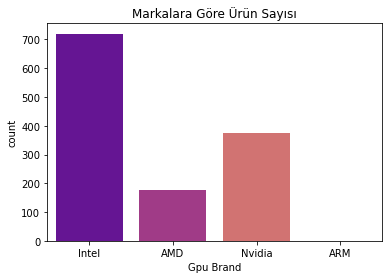

In [36]:
data["Gpu Brand"] = data["Gpu"].apply(lambda x: x.split()[0])
data.drop("Gpu", axis = 1, inplace=True)
sns.countplot(x = data["Gpu Brand"], palette = "plasma")
plt.title("Markalara Göre Ürün Sayısı");

Buarada ARM markasının satışlarının çok düşük olduğunu görüyoruz, bu markayı göz ardı edebiliriz

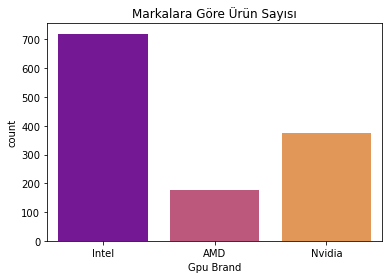

In [37]:
data = data[data["Gpu Brand"] != "ARM"]
data = data.reset_index(drop=True)
sns.countplot(x = data["Gpu Brand"], palette = "plasma")
plt.title("Markalara Göre Ürün Sayısı");

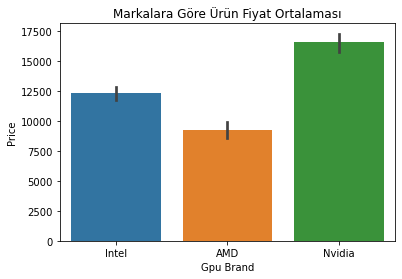

In [38]:
sns.barplot(x = data["Gpu Brand"], y = data["Price"])
plt.title("Markalara Göre Ürün Fiyat Ortalaması");

In [39]:
data["Intel"] = 0
data["AMD"] = 0
data["Nvidia"] = 0

for i in data.index:
    if data["Gpu Brand"][i] == "Intel":
        data["Intel"][i] = 1
    elif data["Gpu Brand"][i] == "AMD":
        data["AMD"][i] = 1
    elif data["Gpu Brand"][i] == "Nvidia":
        data["Nvidia"][i] = 1
        
data.drop("Gpu Brand", axis = 1, inplace=True)
data.head()

C:\Users\ogn_1\AppData\Local\Temp\ipykernel_13028\3037472958.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Intel"][i] = 1
C:\Users\ogn_1\AppData\Local\Temp\ipykernel_13028\3037472958.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["AMD"][i] = 1
C:\Users\ogn_1\AppData\Local\Temp\ipykernel_13028\3037472958.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Nvidia"][i] = 1


,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,OpSys,Weight,Price,Touchscreen,IPS Panel,HDD,SSD,Flash Storage,Hybrid,Intel,AMD,Nvidia
0,Apple,Ultrabook,13.3,4096000,3,8,macOS,1.37,16417.097136,0,1,0.0,128,0,0.0,1,0,0
1,Apple,Ultrabook,13.3,1296000,3,8,macOS,1.34,11015.970336,0,0,0.0,0,128,0.0,1,0,0
2,HP,Notebook,15.6,2073600,3,8,No OS,1.86,7046.280000,0,0,0.0,256,0,0.0,1,0,0
3,Apple,Ultrabook,15.4,5184000,4,16,macOS,1.83,31094.927280,0,1,0.0,512,0,0.0,0,1,0
4,Apple,Ultrabook,13.3,4096000,3,8,macOS,1.37,22102.035840,0,1,0.0,256,0,0.0,1,0,0


### İşletim Sistemleri

3 Grupta toplanacak

In [40]:
data["OpSys"].unique()

array(['macOS', 'No OS', 'Windows 10', 'Mac OS X', 'Linux', 'Android',
       'Windows 10 S', 'Chrome OS', 'Windows 7'], dtype=object)

In [41]:
data["OpSys"].value_counts()

Windows 10      1048
No OS             66
Linux             62
Windows 7         41
Chrome OS         26
macOS             12
Mac OS X           8
Windows 10 S       8
Android            2
Name: OpSys, dtype: int64

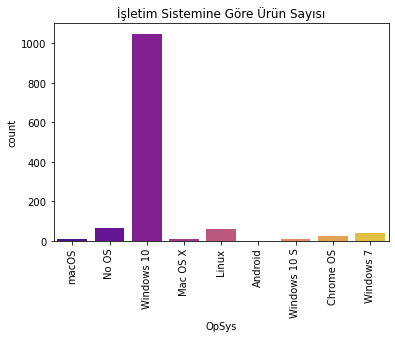

In [42]:
sns.countplot(x = data["OpSys"], palette = "plasma")
plt.xticks(rotation= "vertical")
plt.title("İşletim Sistemine Göre Ürün Sayısı");

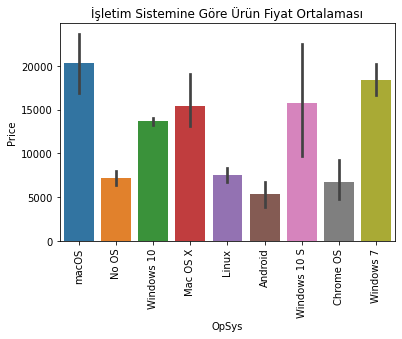

In [43]:
sns.barplot(x = data["OpSys"], y = data["Price"])
plt.xticks(rotation= "vertical")
plt.title("İşletim Sistemine Göre Ürün Fiyat Ortalaması");

In [44]:
def setcategory(x):
    
    if x == "Windows 10" or x == "Windows 7" or x == "Windows 10 S":
        return "Windows"
    
    elif x == "Mac OS X" or x == "macOS":
        return "Mac"
    else:
        return "Other"
    
data["OpSys"] = data["OpSys"].apply(lambda x:setcategory(x))
data.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,OpSys,Weight,Price,Touchscreen,IPS Panel,HDD,SSD,Flash Storage,Hybrid,Intel,AMD,Nvidia
0,Apple,Ultrabook,13.3,4096000,3,8,Mac,1.37,16417.097136,0,1,0.0,128,0,0.0,1,0,0
1,Apple,Ultrabook,13.3,1296000,3,8,Mac,1.34,11015.970336,0,0,0.0,0,128,0.0,1,0,0
2,HP,Notebook,15.6,2073600,3,8,Other,1.86,7046.280000,0,0,0.0,256,0,0.0,1,0,0
3,Apple,Ultrabook,15.4,5184000,4,16,Mac,1.83,31094.927280,0,1,0.0,512,0,0.0,0,1,0
4,Apple,Ultrabook,13.3,4096000,3,8,Mac,1.37,22102.035840,0,1,0.0,256,0,0.0,1,0,0


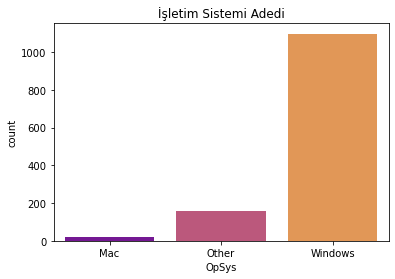

In [45]:
sns.countplot(x = data["OpSys"], palette = "plasma")
plt.title("İşletim Sistemi Adedi");

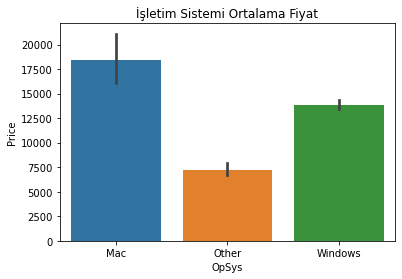

In [46]:
sns.barplot(x = data["OpSys"], y = data["Price"])
plt.title("İşletim Sistemi Ortalama Fiyat");

In [47]:
data["Windows"] = 0
data["Mac"] = 0
data["Other"] = 0

for i in data.index:
    x = data["OpSys"][i]
    
    if x == "Windows":
        data["Windows"][i] = 1
    elif x == "Mac":
        data["Mac"][i] = 1
    else:
        data["Other"][i] = 1
        
        
data.drop("OpSys", axis = 1, inplace=True)
data.head()

C:\Users\ogn_1\AppData\Local\Temp\ipykernel_13028\2334079001.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Mac"][i] = 1
C:\Users\ogn_1\AppData\Local\Temp\ipykernel_13028\2334079001.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Other"][i] = 1
C:\Users\ogn_1\AppData\Local\Temp\ipykernel_13028\2334079001.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Windows"][i] = 1


,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Weight,Price,Touchscreen,IPS Panel,HDD,SSD,Flash Storage,Hybrid,Intel,AMD,Nvidia,Windows,Mac,Other
0,Apple,Ultrabook,13.3,4096000,3,8,1.37,16417.097136,0,1,0.0,128,0,0.0,1,0,0,0,1,0
1,Apple,Ultrabook,13.3,1296000,3,8,1.34,11015.970336,0,0,0.0,0,128,0.0,1,0,0,0,1,0
2,HP,Notebook,15.6,2073600,3,8,1.86,7046.280000,0,0,0.0,256,0,0.0,1,0,0,0,0,1
3,Apple,Ultrabook,15.4,5184000,4,16,1.83,31094.927280,0,1,0.0,512,0,0.0,0,1,0,0,1,0
4,Apple,Ultrabook,13.3,4096000,3,8,1.37,22102.035840,0,1,0.0,256,0,0.0,1,0,0,0,1,0


Marka ve Laptop Tipi bu projenin dışında tutuacaktır. O kolonları atıyorum

In [48]:
data.drop("TypeName", axis = 1, inplace=True)
data.drop("Company", axis = 1, inplace=True)
data.head()

,Inches,ScreenResolution,Cpu,Ram,Weight,Price,Touchscreen,IPS Panel,HDD,SSD,Flash Storage,Hybrid,Intel,AMD,Nvidia,Windows,Mac,Other
0,13.3,4096000,3,8,1.37,16417.097136,0,1,0.0,128,0,0.0,1,0,0,0,1,0
1,13.3,1296000,3,8,1.34,11015.970336,0,0,0.0,0,128,0.0,1,0,0,0,1,0
2,15.6,2073600,3,8,1.86,7046.280000,0,0,0.0,256,0,0.0,1,0,0,0,0,1
3,15.4,5184000,4,16,1.83,31094.927280,0,1,0.0,512,0,0.0,0,1,0,0,1,0
4,13.3,4096000,3,8,1.37,22102.035840,0,1,0.0,256,0,0.0,1,0,0,0,1,0


In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1273 entries, 0 to 1272
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Inches            1273 non-null   float64
 1   ScreenResolution  1273 non-null   int64  
 2   Cpu               1273 non-null   int64  
 3   Ram               1273 non-null   int32  
 4   Weight            1273 non-null   float64
 5   Price             1273 non-null   float64
 6   Touchscreen       1273 non-null   int64  
 7   IPS Panel         1273 non-null   int64  
 8   HDD               1273 non-null   float64
 9   SSD               1273 non-null   int32  
 10  Flash Storage     1273 non-null   int32  
 11  Hybrid            1273 non-null   float64
 12  Intel             1273 non-null   int64  
 13  AMD               1273 non-null   int64  
 14  Nvidia            1273 non-null   int64  
 15  Windows           1273 non-null   int64  
 16  Mac               1273 non-null   int64  


In [50]:
data.corr()["Price"].sort_values(ascending=False)

Price               1.000000
Ram                 0.714134
SSD                 0.652097
Cpu                 0.640753
ScreenResolution    0.478260
Nvidia              0.304432
Windows             0.252532
IPS Panel           0.247532
Touchscreen         0.219901
Mac                 0.090884
Weight              0.079779
Hybrid             -0.003295
Inches             -0.017761
Flash Storage      -0.033868
HDD                -0.101727
Intel              -0.129383
AMD                -0.215231
Other              -0.300286
Name: Price, dtype: float64

# Model Building

In [51]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor

In [52]:
scaler = MinMaxScaler()

test = np.log(data["Price"])
train = data.drop("Price", axis = 1)
train = scaler.fit_transform(train)

X_train, X_test, y_train, y_test = train_test_split(train, test, test_size=0.2, random_state=44)

X_train.shape, X_test.shape

((1018, 17), (255, 17))

## Linear Regression

In [53]:
linear = LinearRegression()

linear.fit(X_train, y_train)
y_pred_linear = linear.predict(X_test)

linear_score = metrics.r2_score(y_test, y_pred_linear)
print("R2 Score", linear_score)
print("MAE", metrics.mean_absolute_error(y_test, y_pred_linear))

R2 Score 0.7819861354583364
MAE 0.21831523817705714


## Ridge Regression

In [54]:
ridge = Ridge()

ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)

print("R2 Score:", metrics.r2_score(y_test, y_pred_ridge))
print("MAE:", metrics.mean_absolute_error(y_test, y_pred_ridge))

R2 Score: 0.7818037778334129
MAE: 0.21884095844611146


In [55]:
param_dists_rigde = {'alpha': np.linspace(0.1, 10, 100)}
rand_search = RandomizedSearchCV(ridge, param_distributions=param_dists_rigde, cv=10, n_iter=100, n_jobs=-1)
rand_search.fit(X_train, y_train)
print("En iyi parametreler:", rand_search.best_params_)
print("En iyi skor:", rand_search.best_score_)

En iyi parametreler: {'alpha': 1.2000000000000002}
En iyi skor: 0.7536417004893528


In [56]:
best_ridge = Ridge(alpha=rand_search.best_params_['alpha'])
best_ridge.fit(X_train, y_train)

y_pred_ridge_CV = best_ridge.predict(X_test)

ridge_score = metrics.r2_score(y_test, y_pred_ridge_CV)
print("R2 Score:", ridge_score)
print("MAE:", metrics.mean_absolute_error(y_test, y_pred_ridge_CV))

R2 Score: 0.7817082668310318
MAE: 0.2189168449940321


## Lasso Regression

In [57]:
lasso = Lasso()

lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)

print("R2 Score:", metrics.r2_score(y_test, y_pred_lasso))
print("MAE:", metrics.mean_absolute_error(y_test, y_pred_lasso))

R2 Score: -0.005686295274483166
MAE: 0.47656457959048487


In [58]:
param_distributions_lasso = {
    'alpha': np.logspace(-4, 4, 20),
    'max_iter': [1000, 5000, 10000],
    'tol': [0.001, 0.0001, 0.00001]
}

lasso_search = RandomizedSearchCV(lasso, param_distributions_lasso, n_iter=100, cv=10, random_state=44, n_jobs=-1)
lasso_search.fit(X_train, y_train)

print("En iyi parametreler:", lasso_search.best_params_)
print("En iyi skor:", lasso_search.best_score_)

En iyi parametreler: {'tol': 0.0001, 'max_iter': 10000, 'alpha': 0.00026366508987303583}
En iyi skor: 0.7533277451231102


In [59]:
best_lasso = Lasso(alpha=lasso_search.best_params_['alpha'], max_iter=lasso_search.best_params_['max_iter'],
              tol=lasso_search.best_params_['tol'])
best_lasso.fit(X_train, y_train)

y_pred_lasso_CV = best_lasso.predict(X_test)

lasso_score = metrics.r2_score(y_test, y_pred_lasso_CV)
print("R2 Score:", lasso_score)
print("MAE:", metrics.mean_absolute_error(y_test, y_pred_lasso_CV))

R2 Score: 0.7811302955063415
MAE: 0.21920871628199168


## Decision Tree

In [60]:
decT = DecisionTreeRegressor()

decT.fit(X_train, y_train)
y_pred_decT = decT.predict(X_test)

print("R2 Score:", metrics.r2_score(y_test, y_pred_decT))
print("MAE:", metrics.mean_absolute_error(y_test, y_pred_decT))

R2 Score: 0.7823275101076771
MAE: 0.20832470109164317


In [61]:
decT.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [62]:
param_dist_decT = {
    "max_depth": [*range(1,20)],
    "min_samples_split": [*range(2,30)]
}

decT_search = RandomizedSearchCV(decT, param_distributions=param_dist_decT, n_iter=100, cv=10, random_state=44, n_jobs=-1)
decT_search.fit(X_train, y_train)

print("En iyi parametreler:", decT_search.best_params_)
print("En iyi skor:", decT_search.best_score_)

En iyi parametreler: {'min_samples_split': 15, 'max_depth': 9}
En iyi skor: 0.8084393150938414


In [63]:
best_decT = DecisionTreeRegressor(max_depth=decT_search.best_params_['max_depth'], min_samples_split=decT_search.best_params_['min_samples_split'])
best_decT.fit(X_train, y_train)

y_pred_decT_CV = best_decT.predict(X_test)

dtree_score = metrics.r2_score(y_test, y_pred_decT_CV)
print("R2 Score:", dtree_score)
print("MAE:", metrics.mean_absolute_error(y_test, y_pred_decT_CV))

R2 Score: 0.840919851014017
MAE: 0.18944308820709216


## Random Forest

In [64]:
randomF = RandomForestRegressor()

randomF.fit(X_train, y_train)
y_pred_randomF = randomF.predict(X_test)

print("R2 Score:", metrics.r2_score(y_test, y_pred_randomF))
print("MAE:", metrics.mean_absolute_error(y_test, y_pred_randomF))

R2 Score: 0.8734289366464578
MAE: 0.1632688121055263


In [65]:
randomF.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [66]:
param_dist_randomF = {
    'n_estimators': [70,80,90,100,110,120,130],
    'max_samples': [None, 0.1, 0.5, 1],
    'max_features' : [0.5, 0.75, 1],
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [*range(2,20)],
    'min_samples_leaf': [*range(1,10)]
}


randomF_search = RandomizedSearchCV(randomF, param_distributions=param_dist_randomF,
                                   n_iter=100, cv=10, scoring='neg_mean_squared_error')
randomF_search.fit(X_train, y_train)

print("En iyi parametreler:", randomF_search.best_params_)
print("En iyi skor:", randomF_search.best_score_)

En iyi parametreler: {'n_estimators': 130, 'min_samples_split': 9, 'min_samples_leaf': 2, 'max_samples': None, 'max_features': 0.5, 'max_depth': None}
En iyi skor: -0.05398959643425455


In [67]:
best_randomF = RandomForestRegressor(n_estimators = randomF_search.best_params_['n_estimators'], 
                                     max_samples = randomF_search.best_params_['max_samples'],
                                     max_features = randomF_search.best_params_['max_features'],
                                     max_depth = randomF_search.best_params_['max_depth'],
                                     min_samples_split = randomF_search.best_params_['min_samples_split'],
                                     min_samples_leaf = randomF_search.best_params_['min_samples_leaf'])
best_randomF.fit(X_train, y_train)

y_pred_randomF_CV = best_randomF.predict(X_test)

forest_score = metrics.r2_score(y_test, y_pred_randomF_CV)
print("R2 Score:", forest_score)
print("MAE:", metrics.mean_absolute_error(y_test, y_pred_randomF_CV))

R2 Score: 0.8885402168737722
MAE: 0.15988314467737066


## XGBoost

In [68]:
xgb = XGBRegressor()

xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

print("R2 Score:", metrics.r2_score(y_test, y_pred_xgb))
print("MAE:", metrics.mean_absolute_error(y_test, y_pred_xgb))

R2 Score: 0.8782744768156427
MAE: 0.16029272553622165


In [69]:
xgb.get_params()

{'objective': 'reg:squarederror',
 'base_score': 0.5,
 'booster': 'gbtree',
 'callbacks': None,
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'gamma': 0,
 'gpu_id': -1,
 'grow_policy': 'depthwise',
 'importance_type': None,
 'interaction_constraints': '',
 'learning_rate': 0.300000012,
 'max_bin': 256,
 'max_cat_to_onehot': 4,
 'max_delta_step': 0,
 'max_depth': 6,
 'max_leaves': 0,
 'min_child_weight': 1,
 'missing': nan,
 'monotone_constraints': '()',
 'n_estimators': 100,
 'n_jobs': 0,
 'num_parallel_tree': 1,
 'predictor': 'auto',
 'random_state': 0,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'sampling_method': 'uniform',
 'scale_pos_weight': 1,
 'subsample': 1,
 'tree_method': 'exact',
 'validate_parameters': 1,
 'verbosity': None}

In [70]:
param_distributions_xgb = {
    'n_estimators': [*range(50,150,10)],
    'max_depth': [*range(2,15)],
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'subsample': [0.5, 0.6, 0.7, 0.8, 0.9, 1],
    'colsample_bytree': [0.5, 0.6, 0.7, 0.8, 0.9, 1]
}

xgb_random = RandomizedSearchCV(estimator=xgb, param_distributions=param_distributions_xgb, n_iter=100, cv=10, random_state=44, n_jobs=-1)
xgb_random.fit(X_train, y_train)

print("En iyi parametreler:", xgb_random.best_params_)
print("En iyi skor:", xgb_random.best_score_)

En iyi parametreler: {'subsample': 0.9, 'n_estimators': 80, 'max_depth': 6, 'learning_rate': 0.2, 'colsample_bytree': 1}
En iyi skor: 0.872841060383216


In [71]:
y_pred_xgb_CV = xgb_random.predict(X_test)

xgb_score = metrics.r2_score(y_test, y_pred_xgb_CV)
print("R2 Score:", xgb_score)
print("MAE:", metrics.mean_absolute_error(y_test, y_pred_xgb_CV))

R2 Score: 0.8832002282138224
MAE: 0.1589698816550948


# Model sonuçları

In [72]:
sonuclar = {"Model Adı" : ["Linear Regression", "Lasso Regression", "Ridge Regression", "Decision Tree", "Random Forest", "XGBoost"],
           "Skor": [linear_score, ridge_score, lasso_score, dtree_score, forest_score, xgb_score]}
df = pd.DataFrame(sonuclar)
df = df.sort_values("Skor", ascending=False)
df = df.reset_index(drop=True)
df

,Model Adı,Skor
0,Random Forest,0.888540
1,XGBoost,0.883200
2,Decision Tree,0.840920
3,Linear Regression,0.781986
4,Lasso Regression,0.781708
5,Ridge Regression,0.781130


Bu sıralama R2 score içi yapıldı. Burada Random Forestin en başarılı model olarak görünüyor ancak mean absolute error'u da işin içine katınca XGBoost'u kullanmanın daha doğru sonuçlar vereceğini düşünüyorum

In [74]:
import pickle
file = open("laptop_price_prediction.pkl", "wb")
pickle.dump(xgb_random, file)
file.close()